In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install skimpy
import skimpy as sk
import scipy.stats as stats
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('cars_info.csv')
df.head(20)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,12366036,2017 Nissan X-Trail ST (4WD) T32 Series 2,26800,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
6,12370057,2016 Ford Territory TX (rwd) SZ MK2,23990,Ford,Territory,TX (rwd),SZ MK2,2016,154136,Wagon,Automatic,Diesel,Used,2720,White,5
7,12381448,2011 BMW 325I Exclusive E90 MY11,18990,BMW,325I,Exclusive,E90 MY11,2011,117306,Sedan,Automatic,Premium Unleaded Petrol,Used,2497,Grey,5
8,12382945,2005 Holden Statesman International WL,15490,Holden,Statesman,International,WL,2005,172151,Sedan,Automatic,Unleaded Petrol,Used,5665,Blue,5
9,12382946,2003 Holden Commodore Berlina Vyii,15490,Holden,Commodore,Berlina,Vyii,2003,186990,Sedan,Automatic,Unleaded Petrol,Used,5665,Green,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [4]:
df.shape

(17048, 16)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17048.0,1.279027e+07,50511.112088,11530130.0,12757148.75,12802071.5,12831313.5,12852464.0
Price,17048.0,3.677778e+04,30305.015328,1000.0,18800.00,29990.0,45990.0,999000.0
Year,17048.0,2.015481e+03,4.721591,1989.0,2013.00,2016.0,2019.0,2022.0
Kilometers,17048.0,1.032314e+05,80413.131476,1.0,44502.25,88454.0,148873.5,2700000.0
CC,17048.0,2.491830e+03,881.985562,875.0,1987.00,2354.0,2981.0,7300.0
Seating Capacity,17048.0,5.115849e+00,1.121791,2.0,5.00,5.0,5.0,14.0


In [6]:
df.isna().sum()

,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


Describing the relationship blw the Target variable and the categorical variable


**P-value:** A low p-value (typically less than 0.05) suggests a statistically significant association between the categorical variable and 'price'.


**Chi2 value:** A higher Chi-square value generally indicates a stronger association.

Based on the p-values, you can determine which categorical variables have a significant relationship with the 'price' variable.

In [7]:
from scipy.stats import chi2_contingency

# Assuming 'price' is your target variable and you want to check its association with all categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Price'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col} and price:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("-" * 30)

Chi-square test for Name and price:
Chi2 value: 31508431.879041348
P-value: 0.0
Degrees of freedom: 30129036
------------------------------
Chi-square test for Brand and price:
Chi2 value: 265814.83824556106
P-value: 0.0
Degrees of freedom: 203812
------------------------------
Chi-square test for Model and price:
Chi2 value: 2969428.9962668484
P-value: 0.0
Degrees of freedom: 2182194
------------------------------
Chi-square test for Variant and price:
Chi2 value: 9715805.534697324
P-value: 0.0
Degrees of freedom: 8300068
------------------------------
Chi-square test for Series and price:
Chi2 value: 9020145.77479584
P-value: 0.0
Degrees of freedom: 8029490
------------------------------
Chi-square test for Type and price:
Chi2 value: 182229.59153464288
P-value: 1.0
Degrees of freedom: 193270
------------------------------
Chi-square test for Gearbox and price:
Chi2 value: 26948.607940512018
P-value: 0.0
Degrees of freedom: 14056
------------------------------
Chi-square test for Fue

In [8]:
df.columns

Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Gearbox', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity'],
      dtype='object')

In [9]:
df.drop(columns=['ID','Name','Brand', 'Model', 'Variant', 'Series','Year','Type'], axis=1, inplace=True)

In [10]:
df

,Price,Kilometers,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,263000,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,19,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,24,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,120579,Automatic,Diesel,Used,2143,Black,4
4,15990,72506,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...
17043,4499,230441,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,4999,237113,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,7999,238768,Automatic,Diesel,Used,2999,Gold,7
17046,14000,49800,Manual,Unleaded Petrol,Used,1797,Blue,5


In [11]:
df['Gearbox'].unique()

array(['Automatic', 'Manual', 'Front', 'AWD', 'Rear'], dtype=object)

In [12]:
df['Fuel'].unique()

array(['Unleaded Petrol', 'Diesel', 'Premium Unleaded Petrol',
       'Premium Unleaded/Electric', 'Unleaded Petrol/Electric',
       'Liquid Petroleum Gas', 'Diesel/Electric'], dtype=object)

In [13]:
df['Status'].unique()

array([' Used', ' New In Stock', ' Demo'], dtype=object)

In [14]:
df['Color'].unique()

array(['Grey', 'Black', 'White', 'Blue', 'Green', 'WHITE', 'Silver',
       'silver', 'Red', 'Gold', 'Fuji', 'Metallic', 'Gun', 'Light',
       'Cool', 'grey', 'BRITISH', 'Burgundy', 'Orange', 'Other', 'Pepper',
       'Titanium', 'white', 'Charcoal', 'Stromboli', 'Mercury', 'Brown',
       'Yellow', 'Leatherette', 'Graphite', 'Deep', 'Beige', 'Artic',
       'Frozen', 'Cream', 'neon', 'Pearl', 'Darkblue', 'maroon',
       'charcoal', 'Dark', 'Cirrus', 'blue', 'gray', 'green', 'Navy',
       'Learher', 'black', 'Glacier', 'Polar', 'Atomic', 'Whtie',
       'Patriot', 'Lighting', 'Sting', 'TRUE', 'SILVER', 'Alpine',
       'Navarra', 'Neptune', 'Tenorite', 'Bronze', 'Slipstream',
       'Horizon', 'Platinum', 'Toy', 'Cherry', 'BLUE', 'Liquid', 'Sliver',
       'While', 'Seduce', 'BLACK', 'Autumn', 'Meteor', 'Soul', 'Whte',
       'Crystal', 'vivid', 'Mountain', 'light', 'Selenite', 'Lava',
       'Harmony', 'GOLD', 'Vivid', 'Granite', 'Gecko', 'red', 'Ceramic',
       'Gray', 'Summit', 

In [15]:
df.drop(columns=['Color','CC'], axis=1, inplace=True)

In [16]:
df

,Price,Kilometers,Gearbox,Fuel,Status,Seating Capacity
0,9999,263000,Automatic,Unleaded Petrol,Used,5
1,117990,19,Automatic,Diesel,New In Stock,7
2,79990,24,Automatic,Diesel,New In Stock,8
3,34990,120579,Automatic,Diesel,Used,4
4,15990,72506,Automatic,Unleaded Petrol,Used,5
...,...,...,...,...,...,...
17043,4499,230441,Automatic,Unleaded Petrol,Used,5
17044,4999,237113,Manual,Unleaded Petrol,Used,5
17045,7999,238768,Automatic,Diesel,Used,7
17046,14000,49800,Manual,Unleaded Petrol,Used,5


**PRICE DISTRIBUTION**

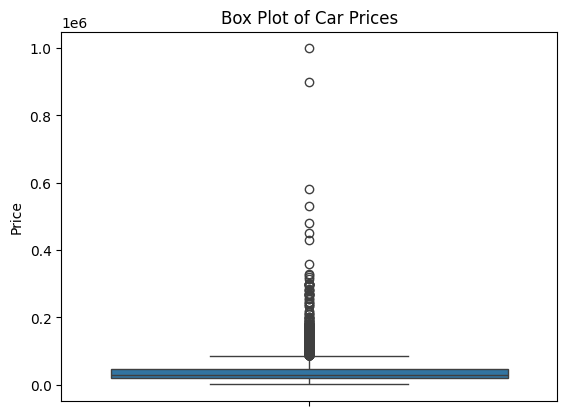

In [17]:
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show()

**CHecking and handling Skew**

Reasoning:

**Import skew:** This function from the scipy.stats module calculates the skewness of a numerical array.

**Calculate Skewness:** We apply the skew function to the 'Price' column of your dataframe to obtain its skewness value.


Skewness = 0: Indicates a perfectly symmetrical distribution.

Skewness > 0: Indicates a right-skewed distribution (tail on the right side is longer).

Skewness < 0: Indicates a left-skewed distribution (tail on the left side is longer).

This will tell you whether the distribution of car prices is skewed and in which direction.

In [18]:
from scipy.stats import skew

# Calculate skewness for the 'Price' variable
price_skewness = skew(df['Price'])

print(f"Skewness of Price: {price_skewness}")

Skewness of Price: 6.399498357352776


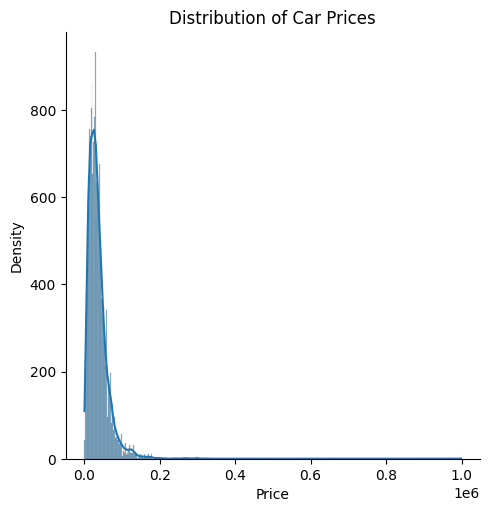

In [19]:
# Plot the distribution of 'Price' with a kernel density estimate
sns.displot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**Treating Skewness**

In [20]:
df

,Price,Kilometers,Gearbox,Fuel,Status,Seating Capacity
0,9999,263000,Automatic,Unleaded Petrol,Used,5
1,117990,19,Automatic,Diesel,New In Stock,7
2,79990,24,Automatic,Diesel,New In Stock,8
3,34990,120579,Automatic,Diesel,Used,4
4,15990,72506,Automatic,Unleaded Petrol,Used,5
...,...,...,...,...,...,...
17043,4499,230441,Automatic,Unleaded Petrol,Used,5
17044,4999,237113,Manual,Unleaded Petrol,Used,5
17045,7999,238768,Automatic,Diesel,Used,7
17046,14000,49800,Manual,Unleaded Petrol,Used,5


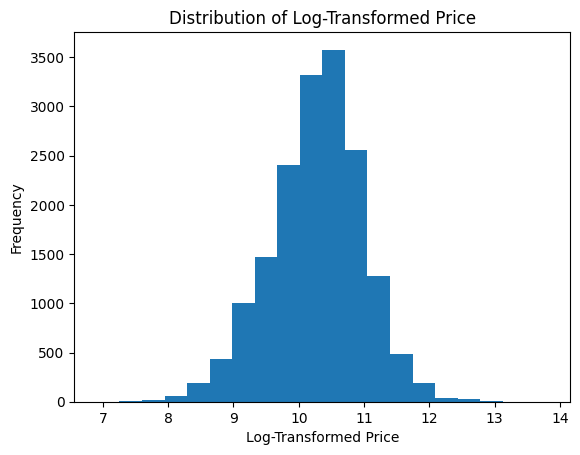

In [21]:
import numpy as np

# Apply log transformation to 'Price' (adding 1 to handle potential zeros)
df['Price_log'] = np.log1p(df['Price'])

# Plot the distribution of the log-transformed 'Price'
import matplotlib.pyplot as plt
plt.hist(df['Price_log'], bins=20)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()

Skewness of Price: -0.25966146842440835


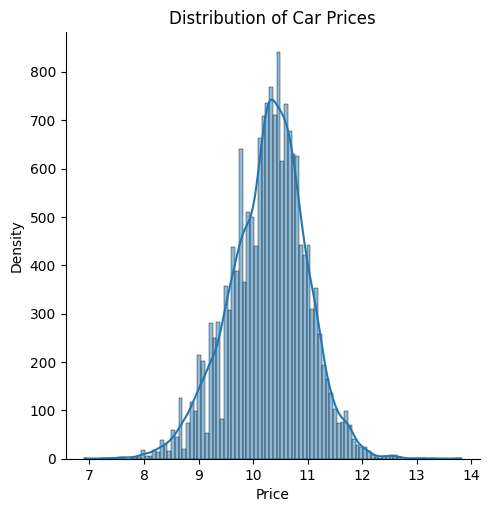

In [22]:
# Calculate skewness for the 'Price' variable
price_skewness_log = skew(df['Price_log'])

print(f"Skewness of Price: {price_skewness_log}")

# Plot the distribution of 'Price' with a kernel density estimate
sns.displot(df['Price_log'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

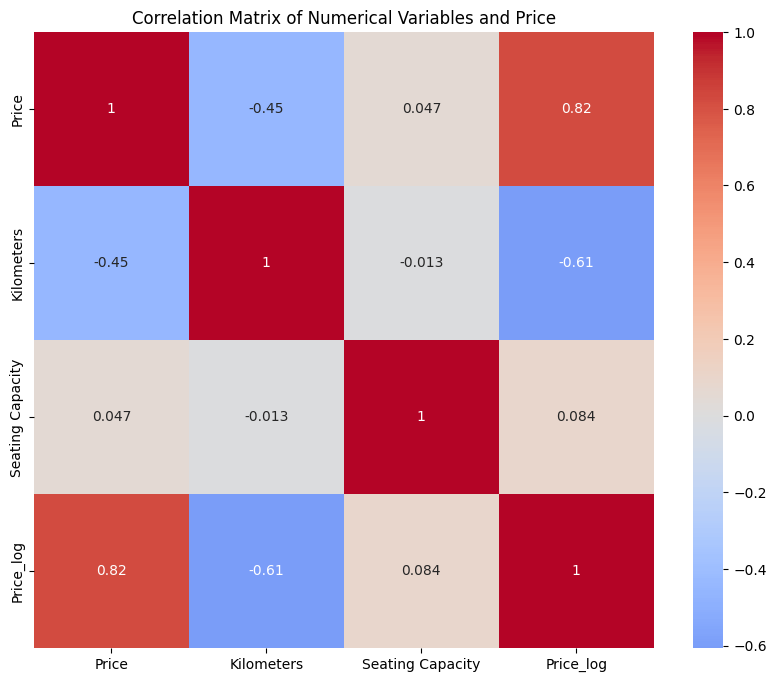

Price               1.000000
Price_log           0.821115
Seating Capacity    0.046629
Kilometers         -0.447490
Name: Price, dtype: float64


In [23]:
# Calculate correlation matrix for numerical columns and 'Price'
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables and Price')
plt.show()

# Print the correlation values with 'Price'
print(correlation_matrix['Price'].sort_values(ascending=False))

Interpretation:

**Positive Correlation:** A positive value indicates a direct relationship (as one variable increases, the other tends to increase as well).

**Negative Correlation:** A negative value indicates an inverse relationship (as one variable increases, the other tends to decrease).

**Correlation Close to 0:** Suggests a weak or no linear relationship between the variables.

This analysis will help you understand how different numerical features relate to the car price.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = pd.get_dummies(df.drop(columns=['Price','Price_log'], axis=1))
Y = df['Price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 541490829.6578008
R-squared: 0.3521574878618079


**Mean Squared Error (MSE):** 541490829.6578 This represents the average squared difference between the predicted car prices and the actual prices in your test dataset. A high MSE suggests that the model's predictions, on average, are quite far from the true values.

**R-squared: 0.3522** This value, also known as the coefficient of determination, indicates that approximately 35.22% of the variance in car prices is explained by your linear regression model. A low R-squared suggests that the model is not capturing a large portion of the variability in the target variable.



In [28]:
# Optionally, print the coefficients of the linear model
print("Coefficients:")
for feature, coef in zip(X, model.coef_):
    print(f"{feature}: {coef}")

Coefficients:
Kilometers: -0.15491401400892904
Seating Capacity: 897.0187029796434
Gearbox_AWD: -2328.1224946184134
Gearbox_Automatic: -12262.030489145332
Gearbox_Front: -14831.64574662404
Gearbox_Manual: -13202.397621884373
Gearbox_Rear: 42624.1963522722
Fuel_Diesel: -4142.736160235798
Fuel_Diesel/Electric: 50314.0930057162
Fuel_Liquid Petroleum Gas: -14181.85213120269
Fuel_Premium Unleaded Petrol: -7506.394783081521
Fuel_Premium Unleaded/Electric: 14580.012006782343
Fuel_Unleaded Petrol: -24673.827605865237
Fuel_Unleaded Petrol/Electric: -14389.294332113333
Status_ Demo: 5895.828455473579
Status_ New In Stock: -724.9889130951384
Status_ Used: -5170.839542378477


In [29]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients_df)

                           Feature   Coefficient
0                       Kilometers     -0.154914
1                 Seating Capacity    897.018703
2                      Gearbox_AWD  -2328.122495
3                Gearbox_Automatic -12262.030489
4                    Gearbox_Front -14831.645747
5                   Gearbox_Manual -13202.397622
6                     Gearbox_Rear  42624.196352
7                      Fuel_Diesel  -4142.736160
8             Fuel_Diesel/Electric  50314.093006
9        Fuel_Liquid Petroleum Gas -14181.852131
10    Fuel_Premium Unleaded Petrol  -7506.394783
11  Fuel_Premium Unleaded/Electric  14580.012007
12            Fuel_Unleaded Petrol -24673.827606
13   Fuel_Unleaded Petrol/Electric -14389.294332
14                    Status_ Demo   5895.828455
15            Status_ New In Stock   -724.988913
16                    Status_ Used  -5170.839542


**Kilometers: -0.1469:** For every additional kilometer on the car's odometer, the predicted price decreases by approximately $0.15, holding all other factors constant. This makes intuitive sense as cars with higher mileage are generally expected to be worth less.

**Gearbox: -321.388:** This suggests that cars with a certain type of gearbox (assuming it's a binary or categorical variable coded as 0 or 1) are predicted to be worth approximately $321 less than cars with the reference gearbox type. You'll need to refer to how you encoded this variable to understand which gearbox type is associated with the lower price.

**Fuel: 8178.789:** Similar to 'Gearbox', this indicates that cars using a specific fuel type are predicted to be worth around $8179 more than cars using the reference fuel type. Again, check your encoding to determine which fuel type is associated with the higher price.

**Status: 6207.408:** Assuming 'Status' refers to the condition of the car (e.g., new vs. used), this suggests that cars with a certain status are predicted to be worth about $6207 more than cars with the reference status. Refer to your encoding to understand which status is associated with the higher price.

**Seating Capacity: 1481.582**: For each additional seat in the car, the predicted price increases by approximately $1482, holding other factors constant. This makes sense as larger cars with more seating capacity are often more expensive.

**HYPERPARAMETER OPTIMIZATION OF THE LINEAR REGRESSION**

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge regression model
model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the final model with the best alpha
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Best alpha: 0.01
Mean Squared Error: 541490015.7245582


**Best alpha: 0.01**

Indicates that a very small amount of regularization is optimal for your dataset. This suggests that your model might not be overly complex and doesn't need strong regularization to prevent overfitting.

The Mean Squared Error (MSE): 541490015.7245582 **bold text**

tells you the average squared difference between your model's predictions and the actual values in your test set. However, the MSE value alone doesn't tell you if the model is "good" or "bad." It depends on the scale of your target variable and the context of your problem.


**DecisionTree_Regressor Model**

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Create a Decision Tree Regressor with default hyperparameters
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 890999505.9758543
R-squared: -0.06599655368137758


**HYPERPARAMETER TURNING USING GID SEARCH FOR THE DECISION_TREE_REGRESSOR**

In [34]:
# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [5],
    'min_samples_split': [4],
    'min_samples_leaf': [2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_tree_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Fit the best model to the training data
best_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_tree_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mean Squared Error: 480456100.0388291
R-squared: 0.4251797633988066


**FORWARD, STEPWISE AND BACKWARD REGRESSION MODE**L

In [35]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Forward Selection
sfs_forward = SFS(model,
                   k_features=(1, X.shape[1]),  # Range of features to select
                   forward=True,
                   floating=False,
                   scoring='neg_mean_squared_error',
                   cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

print("Forward Selection - Best Features:", sfs_forward.k_feature_names_)

# Backward Selection
sfs_backward = SFS(model,
                    k_features=(1, X.shape[1]),
                    forward=False,
                    floating=False,
                    scoring='neg_mean_squared_error',
                    cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)

print("Backward Selection - Best Features:", sfs_backward.k_feature_names_)

# Stepwise Selection (Bidirectional)
sfs_stepwise = SFS(model,
                   k_features=(1, X.shape[1]),
                   forward=True,
                   floating=True,
                   scoring='neg_mean_squared_error',
                   cv=5)
sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

print("Stepwise Selection - Best Features:", sfs_stepwise.k_feature_names_)

# Evaluate the model with selected features (example using forward selection)
selected_features_forward = list(sfs_forward.k_feature_names_)
model.fit(X_train[selected_features_forward], y_train)
y_pred = model.predict(X_test[selected_features_forward])
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Forward Selection):", mse)

Forward Selection - Best Features: ('Kilometers', 'Seating Capacity', 'Gearbox_AWD', 'Gearbox_Rear', 'Fuel_Diesel', 'Fuel_Diesel/Electric', 'Fuel_Premium Unleaded Petrol', 'Fuel_Premium Unleaded/Electric', 'Fuel_Unleaded Petrol', 'Status_ Demo', 'Status_ New In Stock')
Backward Selection - Best Features: ('Kilometers', 'Seating Capacity', 'Gearbox_Rear', 'Fuel_Diesel', 'Fuel_Diesel/Electric', 'Fuel_Liquid Petroleum Gas', 'Fuel_Premium Unleaded Petrol', 'Fuel_Unleaded Petrol', 'Fuel_Unleaded Petrol/Electric', 'Status_ Demo', 'Status_ New In Stock')
Stepwise Selection - Best Features: ('Kilometers', 'Seating Capacity', 'Gearbox_AWD', 'Gearbox_Rear', 'Fuel_Diesel', 'Fuel_Diesel/Electric', 'Fuel_Premium Unleaded Petrol', 'Fuel_Premium Unleaded/Electric', 'Fuel_Unleaded Petrol', 'Status_ Demo', 'Status_ New In Stock')
Mean Squared Error (Forward Selection): 541579520.3383191


In [36]:
# Assuming you have already performed forward, backward, and stepwise selection as in your provided code

# Store the best feature sets for each method
selected_features_forward = list(sfs_forward.k_feature_names_)
selected_features_backward = list(sfs_backward.k_feature_names_)
selected_features_stepwise = list(sfs_stepwise.k_feature_names_)

# Evaluate each model
models = {
    "Forward": selected_features_forward,
    "Backward": selected_features_backward,
    "Stepwise": selected_features_stepwise
}

results = {}

for name, features in models.items():
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Find the model with the lowest MSE
best_model = min(results, key=results.get)
print(f"Best Model: {best_model} with MSE: {results[best_model]}")

Best Model: Forward with MSE: 541579520.3383191


In [37]:
# Get the best feature set
best_features = models[best_model]

# Train the model with the best features
model.fit(X_train[best_features], y_train)

# Make predictions on the test data
y_pred = model.predict(X_test[best_features])

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared of the Best Model ({best_model}): {r2}")

R-squared of the Best Model (Forward): 0.35205137785934204


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor with default hyperparameters
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 558794979.2783759
R-squared: 0.3314547111080576


**HYPERPARAMETER TURNING FOR RANDOM FORST**



In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Choose either GridSearchCV or RandomizedSearchCV
# GridSearchCV (exhaustive search - can be computationally expensive)
# grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# RandomizedSearchCV (random sampling - more efficient for large grids)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the chosen search object to your training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Fit the best model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Mean Squared Error: 436240813.3338337
R-squared: 0.4780791678669797


In [41]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print or visualize the top features
print(feature_importances_df.head())  # Print top 5 features

                         Feature  Importance
0                     Kilometers    0.591392
12          Fuel_Unleaded Petrol    0.134167
1               Seating Capacity    0.095526
7                    Fuel_Diesel    0.046922
10  Fuel_Premium Unleaded Petrol    0.036970


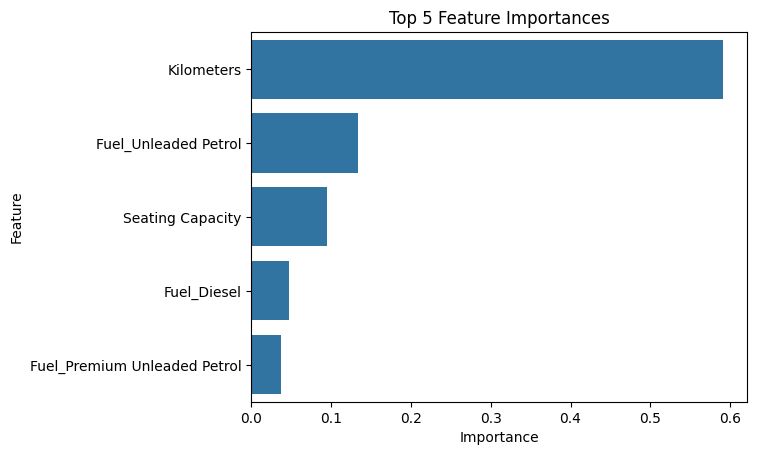

In [42]:
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head())
plt.title('Top 5 Feature Importances')
plt.show()

**Kilometers (Importance: 0.591392):** This indicates that the number of kilometers driven by a car is the most significant factor influencing its price. Higher mileage generally leads to a lower predicted price, which aligns with common understanding.

**Fuel_Unleaded Petrol (Importance: 0.134167):** The type of fuel used by the car, specifically unleaded petrol, is the second most important factor. This suggests that cars using unleaded petrol might have a different price trend compared to other fuel types.

**Seating Capacity (Importance: 0.095526):** The car's seating capacity also plays a notable role in determining its price. Larger cars with more seats tend to be more expensive.

**Fuel_Diesel (Importance: 0.046922):** The fuel type "diesel" is another important factor, indicating that diesel cars might have a different pricing pattern compared to other fuel types.

**Fuel_Premium Unleaded Petrol (Importance: 0.036970):** The use of premium unleaded petrol also has some influence on the price, suggesting a potential price difference between cars using regular unleaded and premium unleaded fuel.

**Overall:**These results suggest that mileage, fuel type, and seating capacity are the primary drivers of car prices in your dataset, according to the Random Forest model.